## Using K Nearest Neighbours for classification on Breast Cancer dataset 

In [34]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np

In [35]:
cancer = datasets.load_breast_cancer()
df = pd.DataFrame(cancer.data)
print(cancer.feature_names)
df.head()

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
print(cancer.target_names)
df.shape

['malignant' 'benign']


(569, 30)

> This dataset contains of 30 continuous value features
<br>
> There are 2 target class - malignant(cancer positive) and benign(cancer negative)
<br>
> Let us first find accuracy using logistic regression 

In [131]:
from sklearn import cross_validation as cv
X_train, X_test, Y_train, Y_test = cv.train_test_split(cancer.data, cancer.target, test_size=0.3)

In [132]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [133]:
Y_pred = clf.predict(X_test)
print(clf.score(X_test, Y_test))
Y_pred-Y_test

0.9298245614035088


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0])

In [134]:
# using the sklearn KNN classifier

In [135]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(weights='uniform', algorithm='auto', p=2)

In [136]:
clf2.fit(X_train, Y_train)
Y_pred = clf2.predict(X_test)
Y_pred = clf.predict(X_test)
print(clf2.score(X_test, Y_test))
Y_pred - Y_test

0.9181286549707602


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0])

NOW WE WILL PLOT THE NUMBER OF NEIGHBOURS AGAINST THE SCORE OBTAINED EACH TIME TO ESTIMATE THE VALUE OF K WITH HIGHEST ACCURACY

In [137]:
x_axis = [0]
scores = [0]
for k in range(1,50,2):
    x_axis.append(k)
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, Y_train)
    scores.append(clf.score(X_test, Y_test))    

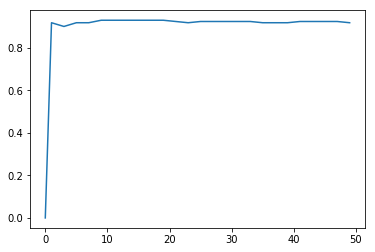

9


In [138]:
import matplotlib.pyplot as plt
plt.plot(x_axis, scores)
plt.show()
optimal_k = x_axis[scores.index(max(scores))]
print(optimal_k)

In [139]:
clf3 = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform', algorithm='auto', p=2)
clf2.fit(X_train, Y_train)
Y_pred = clf2.predict(X_test)
Y_pred = clf.predict(X_test)
print(clf2.score(X_test, Y_test))

0.9181286549707602


### Implementation of the KNN algorithm

In [158]:
# x_test= single data point to be tested

k = optimal_k
def getkey(item):
    return item[0]

def predict(x_test, x_train, y_train):
    dist_arr = [[0 for i in range(2)] for i in range(len(y_train))]
    get_k = [[0 for i in range(2)] for i in range(k)]
    get_result = [0 for i in range(k)]
    for i in range(len(x_train)):
        sum = 0
        for f in range(len(x_train[i])):
            sum += (x_test[f]-x_train[i][f])**2
        dist_arr[i][0]=np.sqrt(sum)
        dist_arr[i][1]=i
    dist_arr = sorted( dist_arr, key = getkey)
    get_k = dist_arr[:k]
    # we got top k distances and the points from which they were measured in get_k 
    count = [0 for i in range(2)]
    # the next 2 lines count how many of the k neighbours belong to class 0 and class 1 , it stored the count in count[0], count[1]
    for i in range(k):
        count[y_train[get_k[i][1]]] += 1
    # return the class of the majority neighbors
    return count.index(np.max(count))

x_test = X_test[0]
print(predict(x_test, X_train, Y_train))
print(Y_test[0])

1
1


In [156]:
# predicting on entire test dataset using predict function written above
Y_predicted = []
for i in range(len(X_test)):
    Y_predicted.append(predict(X_test[i], X_train, Y_train)) 
print(Y_predicted - Y_test)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1 -1  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0
  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  1  0  0
  0  0  0]


In [157]:
def score1(Y_predicted, Y_test):
    error = sum(abs(Y_predicted-Y_test))/len(Y_test)
    accuracy = 1-error
    print(accuracy)
score1(Y_predicted, Y_test)

0.9298245614035088
